In [2]:
from tensorflow.python.keras import models, layers, optimizers
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("dataset/20210122-Kampiun Digilib Clean-jfam-jfunc.csv",encoding='latin-1')
df.head(5)

,source,org_id,doc_id,doc_title,doc_description,Job Family,Job Function,job_role,job_role_clean
0,Kampiun,NaN,27243,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,5.2.3 Learning &amp; Development,Learning & Development
1,Kampiun,NaN,29134,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,5.2.3 Learning &amp; Development,Learning & Development
2,Kampiun,NaN,28690,ILC : Securing Revenue Witel Riau Daratan 2017,NaN,STRATEGIC PLAN & DEVELOPMENT,Strategic Planning,2.1.1 Internal &amp; External Analysis,Internal & External Analysis
3,Kampiun,NaN,33756,SIKAT HABIS FTTH UNSPEC DENGAN MINI OLT OUTDOOR,NaN,DIGITAL & ICT,Telecommunication,1.1.6 Access Network O&amp;M,Access Network Operation & Maintenance
4,Kampiun,NaN,38567,PROSES PENGAJUAN CAPEX FTTH INDIHOME DI WITEL NTB,NaN,DIGITAL & ICT,Telecommunication,1.1.2 Access Network Design &amp; Planning,Access Network Design & Planning


In [3]:
df['title_desc'] = df['doc_title'].fillna('')+" "+df['doc_description'].fillna('')

In [4]:
df.drop([
    'source', 'org_id', 'doc_id', 'job_role','job_role_clean'
], axis=1, inplace=True)
df

,doc_title,doc_description,Job Family,Job Function,title_desc
0,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,Case Study 1 tahun Magang di Kementerian BUMN
1,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,Case Study 1 tahun Magang di Kementerian BUMN
2,ILC : Securing Revenue Witel Riau Daratan 2017,NaN,STRATEGIC PLAN & DEVELOPMENT,Strategic Planning,ILC : Securing Revenue Witel Riau Daratan 2017
3,SIKAT HABIS FTTH UNSPEC DENGAN MINI OLT OUTDOOR,NaN,DIGITAL & ICT,Telecommunication,SIKAT HABIS FTTH UNSPEC DENGAN MINI OLT OUTDOOR
4,PROSES PENGAJUAN CAPEX FTTH INDIHOME DI WITEL NTB,NaN,DIGITAL & ICT,Telecommunication,PROSES PENGAJUAN CAPEX FTTH INDIHOME DI WITEL ...
...,...,...,...,...,...
11296,PENTINGNYA LOYALITAS PELANGGAN,Ditengah-tengah persaingan berbagai bisnis/ind...,COMMERCE & RELATION,Sales,PENTINGNYA LOYALITAS PELANGGAN Ditengah-tengah...
11297,Uji Terima Online dalam Proyek Digitalisasi SP...,1. Latar Belakang \n ...,DIGITAL & ICT,Information Technology,Uji Terima Online dalam Proyek Digitalisasi SP...
11298,REKON TAGIHAN PSB TA TO TELKOM WITEL PURWOKERTO,CARA REKON TAGIHAN PSB TA KE TELKOM \n \n1. A...,BUSINESS ENABLER/ENTERPRISE MGT,Education,REKON TAGIHAN PSB TA TO TELKOM WITEL PURWOKE...
11299,TDSCC (Telkom DIGITAL SOLUTION CARE CENTER) G...,#NAME?,DIGITAL & ICT,Information Technology,TDSCC (Telkom DIGITAL SOLUTION CARE CENTER) G...


In [5]:
import re
def preprocess(text):
    
    text = str(text).lower()
    text = re.sub(r'^<div id="video.*>&nbsp;', '', text) # Video-review part
    text = re.sub('https?://[A-Za-z0-9./]+', '', text) # URLs
    
    # Remove HTML Tag
    text = re.sub('<.*?>', '', text)    
    
    # Remove everything in bracket    
    text = re.sub('\[[^)]*\]', '', text)    
    
    text = re.sub('[/]+', ' ', text) # word1/word2 to word1 word2
    # Remove non-alphanumeric characters (but not - and _, might be useful for tokenization)
    text = re.sub('[^A-Za-z0-9-_ ]+', '', text)

    # Remove words that are digits only
    text = re.sub('\b\d+\b', '', text)                
    
    return text

In [6]:
df['title_desc'] = df['title_desc'].apply(preprocess)

In [7]:
df.head(5)

,doc_title,doc_description,Job Family,Job Function,title_desc
0,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,case study 1 tahun magang di kementerian bumn
1,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,case study 1 tahun magang di kementerian bumn
2,ILC : Securing Revenue Witel Riau Daratan 2017,NaN,STRATEGIC PLAN & DEVELOPMENT,Strategic Planning,ilc securing revenue witel riau daratan 2017
3,SIKAT HABIS FTTH UNSPEC DENGAN MINI OLT OUTDOOR,NaN,DIGITAL & ICT,Telecommunication,sikat habis ftth unspec dengan mini olt outdoor
4,PROSES PENGAJUAN CAPEX FTTH INDIHOME DI WITEL NTB,NaN,DIGITAL & ICT,Telecommunication,proses pengajuan capex ftth indihome di witel ...


## Remove Stopwords

In [24]:
from IPython.display import display, clear_output
import time
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize

len_df = len(df)
start = 0
# end   = 960205
t1 = time.time()
for entry in df['title_desc']:    
    clear_output(wait=True)
    res = [word for word in word_tokenize(entry) if not word in stopwords.words('english') and not word in stopwords.words('indonesian')]
    res = (" ").join(res)  
    p = (start/len_df)*100
    display("%.7f" % p +" - "+str(start))
    df.loc[start,'clean_title_desc'] = res
    if start >= len_df:
        break
    start = start+1
    
t2 = time.time()
print('Duration: {0:.2f}s'.format(round(t2-t1,2)))

'99.9911512 - 11300'

Duration: 1008.54s


In [1]:
df.head(5)

NameError: name 'df' is not defined

## Save & Reload Data

In [27]:
# Save preprocessed data to load further
# df.to_csv('dataset/[PREPROCESSED]20210122-Kampiun Digilib Clean-jfam-jfunc.csv')

In [3]:
# Reload Data
df = pd.read_csv('dataset/[PREPROCESSED]20210122-Kampiun Digilib Clean-jfam-jfunc.csv', index_col=0)

In [12]:
df.isna().sum()

doc_title            18
doc_description     237
Job Family            0
Job Function          0
title_desc            0
clean_title_desc      0
dtype: int64

In [10]:
df['Job Family'].value_counts()

DIGITAL & ICT                      3817
COMMERCE & RELATION                2880
BUSINESS ENABLER/ENTERPRISE MGT    2206
STRATEGIC PLAN & DEVELOPMENT       2169
RISK & COMPLIANCE                   229
Name: Job Family, dtype: int64

In [10]:
df.groupby('Job Function').size()/df.shape[0]

Job Function
Business Development            0.075777
Business Effectiveness          0.083634
DIGITAL PRODUCT & SERVICE       0.135567
Education                       0.046333
Finance                         0.051933
General Affairs                 0.024928
Human Capital                   0.076048
Information Technology          0.079480
Marketing                       0.136109
Relationship Management         0.027095
Sales                           0.083634
Social Community Development    0.013277
Strategic Planning              0.036488
Telecommunication               0.129697
dtype: float64

df drop Job Family Risk & Compliance because of data imbalance

In [13]:
df[df['Job Family'] != 'RISK & COMPLIANCE']

,doc_title,doc_description,Job Family,Job Function,title_desc,clean_title_desc
0,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,case study 1 tahun magang di kementerian bumn,case study 1 magang kementerian bumn
1,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,case study 1 tahun magang di kementerian bumn,case study 1 magang kementerian bumn
2,ILC : Securing Revenue Witel Riau Daratan 2017,NaN,STRATEGIC PLAN & DEVELOPMENT,Strategic Planning,ilc securing revenue witel riau daratan 2017,ilc securing revenue witel riau daratan 2017
3,SIKAT HABIS FTTH UNSPEC DENGAN MINI OLT OUTDOOR,NaN,DIGITAL & ICT,Telecommunication,sikat habis ftth unspec dengan mini olt outdoor,sikat habis ftth unspec mini olt outdoor
4,PROSES PENGAJUAN CAPEX FTTH INDIHOME DI WITEL NTB,NaN,DIGITAL & ICT,Telecommunication,proses pengajuan capex ftth indihome di witel ...,proses pengajuan capex ftth indihome witel ntb
...,...,...,...,...,...,...
11296,PENTINGNYA LOYALITAS PELANGGAN,Ditengah-tengah persaingan berbagai bisnis/ind...,COMMERCE & RELATION,Sales,pentingnya loyalitas pelanggan ditengah-tengah...,loyalitas pelanggan ditengah-tengah persaingan...
11297,Uji Terima Online dalam Proyek Digitalisasi SP...,1. Latar Belakang \n ...,DIGITAL & ICT,Information Technology,uji terima online dalam proyek digitalisasi sp...,uji terima online proyek digitalisasi spbu sol...
11298,REKON TAGIHAN PSB TA TO TELKOM WITEL PURWOKERTO,CARA REKON TAGIHAN PSB TA KE TELKOM \n \n1. A...,BUSINESS ENABLER/ENTERPRISE MGT,Education,rekon tagihan psb ta to telkom witel purwoke...,rekon tagihan psb ta telkom witel purwokerto r...
11299,TDSCC (Telkom DIGITAL SOLUTION CARE CENTER) G...,#NAME?,DIGITAL & ICT,Information Technology,tdscc telkom digital solution care center go ...,tdscc telkom digital solution care center go o...


In [6]:
df.drop(df[df['Job Family'] == 'RISK & COMPLIANCE'].index, inplace = True)

In [7]:
df

,doc_title,doc_description,Job Family,Job Function,title_desc,clean_title_desc
0,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,case study 1 tahun magang di kementerian bumn,case study 1 magang kementerian bumn
1,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,case study 1 tahun magang di kementerian bumn,case study 1 magang kementerian bumn
2,ILC : Securing Revenue Witel Riau Daratan 2017,NaN,STRATEGIC PLAN & DEVELOPMENT,Strategic Planning,ilc securing revenue witel riau daratan 2017,ilc securing revenue witel riau daratan 2017
3,SIKAT HABIS FTTH UNSPEC DENGAN MINI OLT OUTDOOR,NaN,DIGITAL & ICT,Telecommunication,sikat habis ftth unspec dengan mini olt outdoor,sikat habis ftth unspec mini olt outdoor
4,PROSES PENGAJUAN CAPEX FTTH INDIHOME DI WITEL NTB,NaN,DIGITAL & ICT,Telecommunication,proses pengajuan capex ftth indihome di witel ...,proses pengajuan capex ftth indihome witel ntb
...,...,...,...,...,...,...
11296,PENTINGNYA LOYALITAS PELANGGAN,Ditengah-tengah persaingan berbagai bisnis/ind...,COMMERCE & RELATION,Sales,pentingnya loyalitas pelanggan ditengah-tengah...,loyalitas pelanggan ditengah-tengah persaingan...
11297,Uji Terima Online dalam Proyek Digitalisasi SP...,1. Latar Belakang \n ...,DIGITAL & ICT,Information Technology,uji terima online dalam proyek digitalisasi sp...,uji terima online proyek digitalisasi spbu sol...
11298,REKON TAGIHAN PSB TA TO TELKOM WITEL PURWOKERTO,CARA REKON TAGIHAN PSB TA KE TELKOM \n \n1. A...,BUSINESS ENABLER/ENTERPRISE MGT,Education,rekon tagihan psb ta to telkom witel purwoke...,rekon tagihan psb ta telkom witel purwokerto r...
11299,TDSCC (Telkom DIGITAL SOLUTION CARE CENTER) G...,#NAME?,DIGITAL & ICT,Information Technology,tdscc telkom digital solution care center go ...,tdscc telkom digital solution care center go o...


In [14]:
df.groupby('Job Family').size()/df.shape[0]

Job Family
BUSINESS ENABLER/ENTERPRISE MGT    0.199241
COMMERCE & RELATION                0.260116
DIGITAL & ICT                      0.344743
STRATEGIC PLAN & DEVELOPMENT       0.195900
dtype: float64

In [15]:
df['Job Family'].value_counts()

DIGITAL & ICT                      3817
COMMERCE & RELATION                2880
BUSINESS ENABLER/ENTERPRISE MGT    2206
STRATEGIC PLAN & DEVELOPMENT       2169
Name: Job Family, dtype: int64

### Alt 1: Balance Class

In [114]:
# Balance Class
sample_size = 2169 # needs to be less than the number of observations in the minority class
sample_df = df.groupby('Job Family').apply(lambda x: x.sample(sample_size))

In [115]:
sample_df = sample_df.reset_index(level=0, drop=True)

In [116]:
sample_df = sample_df.sort_index()

### Alt 2: Unbalance Class

In [16]:
# Unbalance Class
sample_df = df

In [17]:
sample_df.groupby("Job Family").size()

Job Family
BUSINESS ENABLER/ENTERPRISE MGT    2206
COMMERCE & RELATION                2880
DIGITAL & ICT                      3817
STRATEGIC PLAN & DEVELOPMENT       2169
dtype: int64

In [18]:
sample_df['word_count'] = sample_df['clean_title_desc'].str.split().str.len()

In [19]:
# sample_df.head(5)
sample_df[sample_df['word_count']<=4]

,doc_title,doc_description,Job Family,Job Function,title_desc,clean_title_desc,word_count
133,INSIDEN,INSIDEN jika tidak dilaorkan akan menjadi keru...,BUSINESS ENABLER/ENTERPRISE MGT,Education,insiden insiden jika tidak dilaorkan akan menj...,insiden insiden dilaorkan kerugian,4


In [20]:
result = [x for x in sample_df['word_count']]
print("Mean : {}".format(np.mean(result)))
print("Max  : {}".format(sample_df['word_count'].max()))
print("Min  : {}".format(sample_df['word_count'].min()))

Mean : 72.65128251445087
Max  : 1478
Min  : 4


In [21]:
sample_df.clean_title_desc[:3].values

array(['case study 1 magang kementerian bumn',
       'case study 1 magang kementerian bumn',
       'ilc securing revenue witel riau daratan 2017'], dtype=object)

In [22]:
X = sample_df.clean_title_desc.values
y = sample_df['Job Family'].values
# sample_df['Job Family'].value_counts()

In [24]:
# print(X.shape)
# print(y.shape)
X[:3]

array(['case study 1 magang kementerian bumn',
       'case study 1 magang kementerian bumn',
       'ilc securing revenue witel riau daratan 2017'], dtype=object)

In [84]:
# X_train

## Train Test Split

In [232]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=22, test_size=0.1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=22, test_size=0.1)

In [187]:
print(X_train[144])
print(y_test[144])

telkomsel revenue double digit pengertian resiliansi base stasion telkomsel dual homing infrastruktur jaringan network acces jaringan optik sto berbeda masing- acces jalur optik berbeda sto berpengaruh jaringan optik putus disisi jaringan sto layanan jalansaat telkom jawa barat gencar melaksanakan pemasangan dual homing jaringan telkomsel kebijakan direksi ldquomengutamakan utamardquo telkomsel telepon seluler berbasis gsm harapan andalan perusahaan menjanjikan perhatian tercapainya target telkomsel revenue double digit menggembirakan harapan tanggung meningkatkan kwalitas layanan memuaskan penggunanya revenue dipertahankan meningkatpermasalahan penanggulangan gangguan bts node-b telkomsel dibawah tolok ukur sla service level agreement disepakati telkom telkomsel 3 jam 10 jam berhari-hari mean time recovery mttr dicapai 12 januari 2017 10 februari 2017 data mttr node-b telkomsel jawa barat perangkat access metro-e ont-gpon direct core metro-edengan penanggulangan gangguan loss opportun

In [233]:
# Convert all word to string
X_train = [str (item) for item in X_train]
X_valid = [str (item) for item in X_valid]
X_test = [str (item) for item in X_test]

## Tokenize Words

In [234]:
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence

MAX_FEATURES = 500
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_valid = tokenizer.texts_to_sequences(X_valid)
X_test = tokenizer.texts_to_sequences(X_test)

In [235]:
X_train[144]

[131,
 26,
 131,
 120,
 18,
 64,
 18,
 115,
 78,
 301,
 115,
 301,
 78,
 18,
 115,
 18,
 78,
 3,
 1,
 297,
 430,
 18,
 131,
 273,
 131,
 304,
 96,
 5,
 35,
 131,
 26,
 19,
 3,
 26,
 32,
 336,
 317,
 131,
 23,
 290,
 1,
 131,
 57,
 408,
 324,
 408,
 227,
 162,
 324,
 162,
 7,
 336,
 317,
 131,
 297,
 41,
 204,
 378,
 147,
 341,
 450,
 337,
 378,
 32]

In [236]:
tokenizer.word_index['telkomsel']

131

In [237]:
# reverse index to word
reverse_word_index = dict([(value, key) for (key, value) in tokenizer.word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '') for i in text])

In [239]:
decode_review(X_train[144])

'telkomsel revenue telkomsel infrastruktur jaringan network jaringan optik sto berbeda optik berbeda sto jaringan optik jaringan sto layanan telkom barat melaksanakan jaringan telkomsel kebijakan telkomsel telepon berbasis perusahaan target telkomsel revenue meningkatkan layanan revenue gangguan node b telkomsel service level telkom telkomsel 3 jam 10 jam time 2017 10 2017 data node b telkomsel barat perangkat access metro e ont gpon core metro gangguan'

In [240]:
from sklearn.preprocessing import LabelEncoder

# Encode Label
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_valid = Encoder.fit_transform(y_valid)
y_test = Encoder.fit_transform(y_test)

In [241]:
# len(y_train)
y_train

array([3, 3, 3, ..., 2, 3, 3])

## Padding

In [242]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_LENGTH = max(len(X_train) for X_train in X_train)
X_train = pad_sequences(X_train, maxlen=MAX_LENGTH)
X_valid = pad_sequences(X_valid, maxlen=MAX_LENGTH)
X_test = pad_sequences(X_test, maxlen=MAX_LENGTH)

In [244]:
MAX_LENGTH

454

In [245]:
X_train[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [250]:
y_train[98]

array([0., 1., 0., 0.], dtype=float32)

## Build Model 1

In [132]:
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Embedding(
        input_dim = MAX_FEATURES,
        output_dim = 32,
        input_length = MAX_LENGTH
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25
    )
)

model.add(
    tf.keras.layers.LSTM(
        units=32
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25
    )
)

model.add(
    tf.keras.layers.Dense(
        units=1,
        activation='sigmoid'
    )
)

In [133]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 930, 32)           384000    
_________________________________________________________________
dropout_8 (Dropout)          (None, 930, 32)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 392,353
Trainable params: 392,353
Non-trainable params: 0
_________________________________________________________________


In [134]:
history = model.fit(X_train, y_train, batch_size=256, epochs=300, validation_data=(X_valid, y_valid))

Epoch 1/300
28/28 [==============================] - 9s 245ms/step - loss: 0.5460 - accuracy: 0.2517 - val_loss: -1.1998 - val_accuracy: 0.2446
Epoch 2/300
28/28 [==============================] - 6s 228ms/step - loss: -1.9344 - accuracy: 0.2450 - val_loss: -2.7721 - val_accuracy: 0.2446
Epoch 3/300
28/28 [==============================] - 6s 231ms/step - loss: -3.3482 - accuracy: 0.2517 - val_loss: -3.6614 - val_accuracy: 0.2446
Epoch 4/300
28/28 [==============================] - 7s 234ms/step - loss: -4.2882 - accuracy: 0.2479 - val_loss: -4.3109 - val_accuracy: 0.2446
Epoch 5/300
28/28 [==============================] - 6s 229ms/step - loss: -4.9750 - accuracy: 0.2441 - val_loss: -4.8690 - val_accuracy: 0.2446
Epoch 6/300
28/28 [==============================] - 6s 230ms/step - loss: -5.3613 - accuracy: 0.2504 - val_loss: -5.3931 - val_accuracy: 0.2446
Epoch 7/300
28/28 [==============================] - 6s 233ms/step - loss: -6.0355 - accuracy: 0.2481 - val_loss: -5.9017 - val_acc

28/28 [==============================] - 7s 233ms/step - loss: -85.6392 - accuracy: 0.4535 - val_loss: -64.2406 - val_accuracy: 0.3649
Epoch 112/300
28/28 [==============================] - 7s 234ms/step - loss: -83.2806 - accuracy: 0.4627 - val_loss: -64.8674 - val_accuracy: 0.3636
Epoch 113/300
28/28 [==============================] - 7s 233ms/step - loss: -86.6757 - accuracy: 0.4549 - val_loss: -65.5291 - val_accuracy: 0.3624
Epoch 114/300
28/28 [==============================] - 7s 234ms/step - loss: -86.9014 - accuracy: 0.4514 - val_loss: -65.9639 - val_accuracy: 0.3662
Epoch 115/300
28/28 [==============================] - 7s 236ms/step - loss: -89.6370 - accuracy: 0.4535 - val_loss: -66.5315 - val_accuracy: 0.3611
Epoch 116/300
28/28 [==============================] - 7s 251ms/step - loss: -89.4266 - accuracy: 0.4524 - val_loss: -67.0088 - val_accuracy: 0.3662
Epoch 117/300
28/28 [==============================] - 7s 238ms/step - loss: -89.0688 - accuracy: 0.4622 - val_loss: -67

Epoch 166/300
28/28 [==============================] - 7s 234ms/step - loss: -121.6942 - accuracy: 0.4754 - val_loss: -93.3586 - val_accuracy: 0.3752
Epoch 167/300
28/28 [==============================] - 7s 234ms/step - loss: -127.2031 - accuracy: 0.4580 - val_loss: -94.6863 - val_accuracy: 0.3726
Epoch 168/300
28/28 [==============================] - 7s 235ms/step - loss: -122.4204 - accuracy: 0.4757 - val_loss: -95.3444 - val_accuracy: 0.3713
Epoch 169/300
28/28 [==============================] - 7s 234ms/step - loss: -123.3380 - accuracy: 0.4755 - val_loss: -95.8110 - val_accuracy: 0.3700
Epoch 170/300
28/28 [==============================] - 7s 235ms/step - loss: -124.4603 - accuracy: 0.4726 - val_loss: -96.3947 - val_accuracy: 0.3713
Epoch 171/300
28/28 [==============================] - 7s 235ms/step - loss: -124.5505 - accuracy: 0.4690 - val_loss: -95.7351 - val_accuracy: 0.3713
Epoch 172/300
28/28 [==============================] - 7s 234ms/step - loss: -126.7758 - accuracy: 0

28/28 [==============================] - 6s 232ms/step - loss: -196.7765 - accuracy: 0.4780 - val_loss: -150.5012 - val_accuracy: 0.3713
Epoch 275/300
28/28 [==============================] - 6s 231ms/step - loss: -201.6691 - accuracy: 0.4690 - val_loss: -144.3954 - val_accuracy: 0.3752
Epoch 276/300
28/28 [==============================] - 7s 233ms/step - loss: -199.0430 - accuracy: 0.4764 - val_loss: -149.2083 - val_accuracy: 0.3675
Epoch 277/300
28/28 [==============================] - 6s 231ms/step - loss: -193.8332 - accuracy: 0.4771 - val_loss: -151.2973 - val_accuracy: 0.3739
Epoch 278/300
28/28 [==============================] - 7s 232ms/step - loss: -200.6761 - accuracy: 0.4745 - val_loss: -150.1866 - val_accuracy: 0.3726
Epoch 279/300
28/28 [==============================] - 7s 233ms/step - loss: -202.9563 - accuracy: 0.4743 - val_loss: -151.9337 - val_accuracy: 0.3764
Epoch 280/300
28/28 [==============================] - 7s 233ms/step - loss: -200.0285 - accuracy: 0.4763 - 

### Build Model 2

In [251]:
print(X_train.shape)
print(y_train.shape)

(8967, 454)
(8967, 4)


In [248]:
# Model 2: 5 output
# Convert to categorical with 4 output

y_train = tf.keras.utils.to_categorical(y_train, 4, dtype="float32")
y_valid = tf.keras.utils.to_categorical(y_valid, 4, dtype="float32")
y_test = tf.keras.utils.to_categorical(y_test, 4, dtype="float32")

In [285]:
# Model 2: Categorical_crossentropy

model2 = tf.keras.models.Sequential()

model2.add(
    tf.keras.layers.Embedding(
        input_dim = MAX_FEATURES,
        output_dim = 32,
        input_length = MAX_LENGTH
    )
)

model2.add(tf.keras.layers.LSTM(units=32, dropout=0.5))

model2.add(tf.keras.layers.Dense(4, activation='softmax'))

## Trying Bidirectional LSTM Model

In [282]:
model2 = tf.keras.models.Sequential()
model2.add(layers.Embedding(input_dim = MAX_FEATURES,
                            output_dim = 32,
                            input_length = MAX_LENGTH))
model2.add(layers.Bidirectional(layers.LSTM(32,dropout=0.6)))
model2.add(layers.Dense(4,activation='softmax'))
# model2.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
# history = model2.fit(X_train, y_train, epochs=30,validation_data=(X_test, y_test),callbacks=[checkpoint2])


In [286]:
model2.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 454, 32)           16000     
_________________________________________________________________
lstm_19 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 132       
Total params: 24,452
Trainable params: 24,452
Non-trainable params: 0
_________________________________________________________________


In [287]:
# history 2
history2 = model2.fit(X_train, y_train, batch_size=256, epochs=150, validation_data=(X_valid, y_valid))

Epoch 1/150
36/36 [==============================] - 8s 141ms/step - loss: 1.3594 - accuracy: 0.3410 - val_loss: 1.2704 - val_accuracy: 0.4142
Epoch 2/150
36/36 [==============================] - 4s 121ms/step - loss: 1.2567 - accuracy: 0.4320 - val_loss: 1.2085 - val_accuracy: 0.5035
Epoch 3/150
36/36 [==============================] - 4s 121ms/step - loss: 1.2113 - accuracy: 0.5172 - val_loss: 1.1566 - val_accuracy: 0.5517
Epoch 4/150
36/36 [==============================] - 4s 121ms/step - loss: 1.1430 - accuracy: 0.5485 - val_loss: 1.1171 - val_accuracy: 0.5446
Epoch 5/150
36/36 [==============================] - 4s 121ms/step - loss: 1.0904 - accuracy: 0.5582 - val_loss: 1.1086 - val_accuracy: 0.5446
Epoch 6/150
36/36 [==============================] - 4s 121ms/step - loss: 1.0457 - accuracy: 0.5774 - val_loss: 1.0592 - val_accuracy: 0.5517
Epoch 7/150
36/36 [==============================] - 4s 121ms/step - loss: 1.0179 - accuracy: 0.5801 - val_loss: 1.0599 - val_accuracy: 0.5517

Epoch 58/150
36/36 [==============================] - 4s 120ms/step - loss: 0.8019 - accuracy: 0.6888 - val_loss: 1.0391 - val_accuracy: 0.5988
Epoch 59/150
36/36 [==============================] - 4s 121ms/step - loss: 0.8027 - accuracy: 0.6842 - val_loss: 1.0292 - val_accuracy: 0.6018
Epoch 60/150
36/36 [==============================] - 4s 123ms/step - loss: 0.7913 - accuracy: 0.6966 - val_loss: 1.0486 - val_accuracy: 0.5928
Epoch 61/150
36/36 [==============================] - 4s 121ms/step - loss: 0.8155 - accuracy: 0.6767 - val_loss: 1.0281 - val_accuracy: 0.6008
Epoch 62/150
36/36 [==============================] - 4s 120ms/step - loss: 0.7808 - accuracy: 0.6973 - val_loss: 1.0779 - val_accuracy: 0.5918
Epoch 63/150
36/36 [==============================] - 4s 121ms/step - loss: 0.7892 - accuracy: 0.6972 - val_loss: 1.0304 - val_accuracy: 0.6048
Epoch 64/150
36/36 [==============================] - 4s 125ms/step - loss: 0.7967 - accuracy: 0.6862 - val_loss: 1.0511 - val_accuracy:

Epoch 115/150
36/36 [==============================] - 4s 122ms/step - loss: 0.7148 - accuracy: 0.7203 - val_loss: 1.0876 - val_accuracy: 0.6088
Epoch 116/150
36/36 [==============================] - 4s 121ms/step - loss: 0.7138 - accuracy: 0.7195 - val_loss: 1.0975 - val_accuracy: 0.6179
Epoch 117/150
36/36 [==============================] - 4s 123ms/step - loss: 0.7208 - accuracy: 0.7151 - val_loss: 1.0664 - val_accuracy: 0.6058
Epoch 118/150
36/36 [==============================] - 4s 121ms/step - loss: 0.7152 - accuracy: 0.7247 - val_loss: 1.0770 - val_accuracy: 0.6088
Epoch 119/150
36/36 [==============================] - 4s 122ms/step - loss: 0.7303 - accuracy: 0.7191 - val_loss: 1.1030 - val_accuracy: 0.6108
Epoch 120/150
36/36 [==============================] - 4s 123ms/step - loss: 0.7206 - accuracy: 0.7217 - val_loss: 1.0697 - val_accuracy: 0.6169
Epoch 121/150
36/36 [==============================] - 4s 122ms/step - loss: 0.7348 - accuracy: 0.7118 - val_loss: 1.0653 - val_ac

## Evaluate Model 1 & 2

In [102]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [47]:
import matplotlib.pyplot as plt

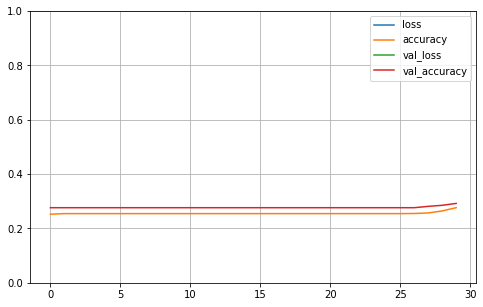

In [104]:
# Model 1

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

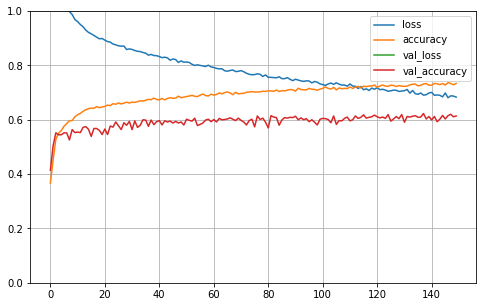

In [288]:
# Model 2: overfit

pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

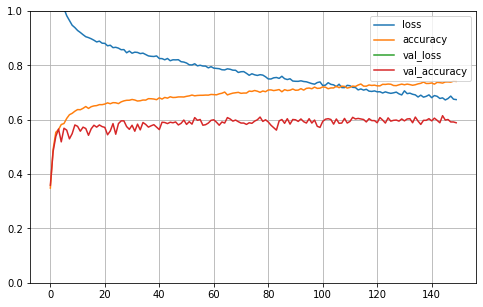

In [266]:
# Model 2: overfit

pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

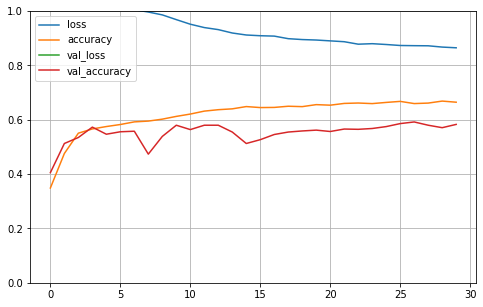

In [255]:
# Model 2: overfit

pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [208]:
model2.evaluate(X_test, y_test)

35/35 [==============================] - 1s 26ms/step - loss: 1.1945 - accuracy: 0.6534


[1.1945046186447144, 0.6534296274185181]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model2.predict(X_test)

cm = confusion_matrix(y_test.argmax(axis=1), np.argmax(y_pred, axis=1))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=class_name)
ax.yaxis.set(ticks=(0, 1), ticklabels=class_name)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [156]:
cm.sum()

997

## Temp

In [106]:
df.dtypes

doc_title           object
doc_description     object
Job Family          object
Job Function        object
title_desc          object
clean_title_desc    object
word_count           int64
dtype: object

In [159]:
MAX_FEATURES

12000

In [265]:
y

array(['BUSINESS ENABLER/ENTERPRISE MGT',
       'BUSINESS ENABLER/ENTERPRISE MGT', 'STRATEGIC PLAN & DEVELOPMENT',
       ..., 'BUSINESS ENABLER/ENTERPRISE MGT', 'DIGITAL & ICT',
       'DIGITAL & ICT'], dtype=object)

# Summary

Model LSTM diperoleh akurasi sebesar xxx namun tingkat loss pada model masih sangat tinggi dan model tergolong overfit karena validation loss jauh lebih tinggi dari training loss, hal ini bisa disebabkan oleh 
1. Dataset yang kecil (11072 data untuk 4 class) 
2. Data label yang tidak seimbang. Data label dapat disampling, namun dataset menjadi lebih kecil
3. Data deskripsi yang tidak relevan